## Problem Statment:

Imagine the digits in the test set of the MNIST dataset
(http://yann.lecun.com/exdb/mnist/) got cut in half vertically and shuffled around. Although the
two resulting halves of each image do not have any shared pixels, there are
similarities in their structure. Implement a way to restore the original test
set from the two halves, whilst maximising the overall matching accuracy.



## Purposed Solution:
Take pixel values at the edge of both images and attempt different ways of relating them to each other. My metric will be based off of subtracting one array of left sided pixel edge values from the other side for all right hand images. I then sum the absolute difference of the values and the min of the list of values will be considered the "correct" prediction

### Methods I am going to attempt:

- comparing last pixel values 
- averaging the last 2 pixels on each end and comparing 
- data generation through pixel repition and use moving windows to generate a "gradient"



In [150]:
from keras.datasets import mnist
from matplotlib import pyplot
 

In [151]:
# loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [152]:
# Working with a subset that can be expanded
train_X = train_X[0:1000]

In [153]:
# Cutting Images in half for edge detection algo
height, width = train_X[0].shape
half = width//2

In [154]:
# I want to do half-1 or half+1, but I think its been resulting in longer computation times, so I'm not going to generalize 
from itertools import chain

# Eliminates list within list data formatting 
left_slice_train_X = [list(chain.from_iterable(train_X[i][:, 13:half])) for i in range(len(train_X))]
right_slice_train_X = [list(chain.from_iterable(train_X[i][:, half: 15])) for i in range(len(train_X))]

# 2 Pixel version thats been left in list format 
left_slice_two_px = [train_X[i][:, 12:half] for i in range(len(train_X))]
right_slice_two_px = [train_X[i][:, half:16] for i in range(len(train_X))]

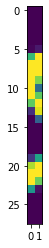

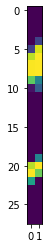

In [155]:
#plotting
from matplotlib import pyplot
pyplot.imshow(left_slice_two_px[0])#, cmap=pyplot.get_cmap('gray')
pyplot.show()
pyplot.imshow(right_slice_two_px[1])#, cmap=pyplot.get_cmap('gray')
pyplot.show()

In [156]:
# Averaging out the values 
two_px_left = [np.sum(left_slice_two_px[i], axis = 1)/2 for i in range(len(left_slice_two_px))]
two_px_right = [np.sum(right_slice_two_px[i], axis = 1)/2 for i in range(len(right_slice_two_px))]

In [157]:
import pandas as pd
import numpy as np
df = pd.DataFrame([left_slice_train_X, right_slice_train_X, two_px_left, two_px_right])
df = df.T
df = df.rename(columns = {0:'left', 1:'right', 2:'left_av', 3:'right_av'})
df.head()

,left,right,left_av,right_av
0,"[0, 0, 0, 0, 0, 18, 253, 253, 253, 205, 90, 19...","[0, 0, 0, 0, 0, 18, 253, 253, 198, 11, 0, 2, 7...","[0.0, 0.0, 0.0, 0.0, 0.0, 10.5, 211.5, 253.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 18.0, 253.0, 253.0, ..."
1,"[0, 0, 0, 0, 0, 0, 54, 224, 252, 253, 179, 84,...","[0, 0, 0, 0, 0, 48, 227, 252, 252, 190, 12, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 27.0, 142.0, 25...","[0.0, 0.0, 0.0, 0.0, 25.5, 143.0, 240.0, 252.5..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 150...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 241...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 104, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 205, 251...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 148, 252, 190, 14, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 210, 253, 65, 0, 0, 8, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 101.5, 242...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 231.5, 221..."


In [158]:
#The scoring metric that was defined above
def scoring_metric(column_name_1,column_name_2):
    correct = 0
    for i in range(len(df)):
        result = abs(np.array(df[column_name_1][i]) - np.array(df[column_name_2].values.tolist())) # vectorized 
        sums = [sum(result[j]) for j in range(len(result))]
        min_value = min(sums)
        min_index = sums.index(min_value)
        if i == min_index:
            correct += 1
    print(correct/len(df))

In [159]:
# Scoring Metric:
# No funny business or transformations of any sort. Taking the left np array and subtracting its values element-wise on the entire right column, summing the abs of the difference, and taking the smallest resulting value as the match.

# Ended up using it so often that I just decided to make it a function
def scoring(column_1, column_2):
    correct = 0
    for i in range(len(df)):
        result = abs(np.array(df[column_1][i]) - np.array(df[column_2].values.tolist())) # vectorized 
        sums = [sum(result[j]) for j in range(len(result))]
        min_value = min(sums)
        min_index = sums.index(min_value)
        if i == min_index:
            correct += 1
    return correct/len(df) 


In [160]:
scoring('left', 'right')
# with 100 samples I have a 0.21 of correctly associating images 
# with 1000 samples I have a 0.094 of correctly associating images
# with 10000 samples I have a 0.0472 of correctly associating images

0.094

In [161]:
scoring('left_av', 'right')
# with 100 samples I have a 0.2 of correctly associating images 
# with 1000 samples I have a 0.077 of correctly associating images

0.077

In [162]:
scoring('left', 'right_av')
# with 100 samples I have a 0.2 of correctly associating images 
# with 1000 samples I have a 0.092 of correctly associating images

0.092

In [163]:
scoring('left_av', 'right_av')
# with 100 samples I have a 0.15 of correctly associating images 
# with 1000 samples I have a 0.052 of correctly associating images

0.052

In [165]:
# Repeating elements to "generate data" to smoothen 
repeated_L_2 = [np.repeat(df.left[i],2) for i in range(len(df.left))]
df['repeated_left_2'] =  repeated_L_2

repeated_R_2 = [np.repeat(df.right[i],2) for i in range(len(df.right))]
df['repeated_right_2'] =  repeated_R_2

In [166]:
#Window method to average out
avg_L_2 = []
for i in range(len(df['repeated_left_2'])):
    numbers = df['repeated_left_2'][i]
    window_size = 3
    i = 0
    moving_averages = []
    while i < len(numbers) - window_size + 1:
        this_window = numbers[i : i + window_size]
        window_average = sum(this_window) / window_size
        moving_averages.append(window_average)
        i += 1
    avg_L_2.append(moving_averages)


In [167]:
avg_R_2 = []
for i in range(len(df['repeated_right_2'])):
    numbers = df['repeated_right_2'][i]
    window_size = 3
    i = 0
    moving_averages = []
    while i < len(numbers) - window_size + 1:
        this_window = numbers[i : i + window_size]
        window_average = sum(this_window) / window_size
        moving_averages.append(window_average)
        i += 1
    avg_R_2.append(moving_averages)

In [168]:
df['window_left_2'] =  avg_L_2
df['window_right_2'] =  avg_R_2

In [169]:
scoring('window_left_2', 'window_right_2')
# Significant imporvement when I apply a "gradient"
# with 100 samples I have a 0.38 of correctly associating images 
# with 1000 samples I have a 0.198 of correctly associating images
# with 10000 samples I have a 0.089 of correctly associating images

0.198

In [170]:
repeated_L_3 = [np.repeat(df.left[i],3) for i in range(len(df.left))]
df['repeated_left_3'] =  repeated_L_3
repeated_R_3 = [np.repeat(df.right[i],3) for i in range(len(df.right))]
df['repeated_right_3'] =  repeated_R_3

In [171]:
avg_L_3 = []
for i in range(len(df['repeated_left_3'])):
    numbers = df['repeated_left_3'][i]
    window_size = 3
    i = 0
    moving_averages = []
    while i < len(numbers) - window_size + 1:
        this_window = numbers[i : i + window_size]
        window_average = sum(this_window) / window_size
        moving_averages.append(window_average)
        i += 1
    avg_L_3.append(moving_averages)

In [172]:
avg_R_3 = []
for i in range(len(df['repeated_right_3'])):
    numbers = df['repeated_right_3'][i]
    window_size = 3
    i = 0
    moving_averages = []
    while i < len(numbers) - window_size + 1:
        this_window = numbers[i : i + window_size]
        window_average = sum(this_window) / window_size
        moving_averages.append(window_average)
        i += 1
    avg_R_3.append(moving_averages)

In [173]:
df['window_left_3'] =  avg_L_3
df['window_right_3'] =  avg_R_3

In [174]:
scoring('window_left_3', 'window_right_3')
# with 100 samples I have a 0.36 of correctly associating images 
# with 1000 samples I have a 0.194 of correctly associating images
# with 10000 samples I have a 0.0898 of correctly associating images

0.194

In [175]:
avg_L_3_2 = []
for i in range(len(df['repeated_left_3'])):
    numbers = df['repeated_left_3'][i]
    window_size = 2
    i = 0
    moving_averages = []
    while i < len(numbers) - window_size + 1:
        this_window = numbers[i : i + window_size]
        window_average = sum(this_window) / window_size
        moving_averages.append(window_average)
        i += 1
    avg_L_3_2.append(moving_averages)

In [176]:
avg_R_3_2 = []
for i in range(len(df['repeated_right_3'])):
    numbers = df['repeated_right_3'][i]
    window_size = 2
    i = 0
    moving_averages = []
    while i < len(numbers) - window_size + 1:
        this_window = numbers[i : i + window_size]
        window_average = sum(this_window) / window_size
        moving_averages.append(window_average)
        i += 1
    avg_R_3_2.append(moving_averages)

In [177]:
df['window_left_3_2'] =  avg_L_3_2
df['window_right_3_2'] =  avg_R_3_2

In [178]:
scoring('window_left_3_2', 'window_right_3_2')

# with 100 samples I have a 0.36 of correctly associating images 
# with 1000 samples I have a 0.195 of correctly associating images
# with 10000 samples I have a 0.0907 of correctly associating images

0.195

### Given more time:

- Combine methods
- Utilize the associated label (if the label for the numbers do not match, move on to next min) 
- Produce a NN with a structure similar to face recognition 